<h1>Análise das Músicas Mais Populares ao Longo do Tempo</h1>

<h4>Integrantes:</h4>
<ul><li>Irlan Miguel de Oliveira Honorato</li>
<li>José Victor Justino de Oliveira</li>
<li>Labert Paixão Ribeiro</li></ul>

<h2>1. Introdução</h2>

O desenvolvimento deste projeto foi motivado pela necessidade de compreender padrões de comportamento na indústria musical, mais especificamente analisando as músicas mais populares do Spotify ao longo dos anos. Através da coleta e análise desses dados, buscamos identificar tendências relacionadas à popularidade, duração, gêneros musicais predominantes e artistas de maior destaque.

<h3>1.1 Objetivo Geral</h3>

<ul><li>Levantar insights sobre a popularidade das músicas no Spotify, considerando variáveis como duração, gêneros e artistas.</li></ul>

<h3>1.2 Objetivos Especificos</h3>

<ul>
<li>Analisar a evolução da duração das músicas ao longo dos anos</li>
<li>Identificar os gêneros musicais mais recorrentes entre as faixas populares</li>
<li>Verificar a relação entre a duração da faixa e sua popularidade</li>
<li>Analisar a distribuição da popularidade das músicas</li>
<li>Identificar artistas que aparecem com maior frequência entre os tops tracks.</li>
</ul>

<h3>1.3 Bibliotecas utilizadas:</h3>

As bibliotecas utilizadas estão contidas no arquivo requirements.txt no diretorio do presente trabalho.


>pip install -r requirements.txt

<h2>2. Dados Utilizados</h2>

Os dados foram coletados diretamente da API do Spotify utilizando a biblioteca Spotipy. 
As faixas correspondem às músicas mais populares por ano entre 2009 e 2024.

<h3>2.1 Descrição do dataset</h3>

As colunas do dataset são:

<ul>
<li>Year: Ano da faixa</li>
<li>Track: Nome da música</li>
<li>Artist: Nome do(s) artita(s)</li>
<li>Album: Álbum de origem</li>
<li>Duration (s): Duração em segundos</li>
<li>Genres: Gênero(s) do artista principal</li>
<li>Track ID: ID da faixa no Spotify</li>
<li>Release Date: Data de lançamento</li>
<li>Popularity: Índice de popularidade no Spotify (0 à 100)</li>
</ul>

Exemplo de como está o dataset:

In [10]:
# Exibir uma música de cada ano como exemplo ilustrativo
exemplos = df.groupby('Year').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
exemplos = exemplos[['Year', 'Track', 'Artist', 'Album', 'Duration (s)', 'Genres', 'Popularity']]

# Mostrar a tabela
exemplos


,Year,Track,Artist,Album,Duration (s),Genres,Popularity
0,2009,Rockin' That Shit,The-Dream,Love Vs Money,221,r&b,66
1,2010,Over,Drake,Thank Me Later,233,"rap, hip hop",68
2,2011,Motivation,"Kelly Rowland, Lil Wayne",Here I Am (Deluxe Version),230,Unknown,69
3,2012,Forrest Gump,Frank Ocean,channel ORANGE,194,Unknown,71
4,2013,Come a Little Closer,Cage The Elephant,Melophobia,229,modern rock,71
5,2014,Trophies,"Young Money, Drake",Rise Of An Empire (Deluxe Edition),188,Unknown,71
6,2015,You Are the Right One,Sports,Naked All the Time,172,Unknown,74
7,2016,Come and See Me (feat. Drake),"PARTYNEXTDOOR, Drake",PARTYNEXTDOOR 3 (P3),235,r&b,73
8,2017,Lady May,Tyler Childers,Purgatory,183,"country, red dirt, alt country, texas country,...",75
9,2018,Love Lies,"Khalid, Normani",Love Lies,201,Unknown,75


<h3>2.2 Exploração Inicial dos Dados</h3>

<h5>Importando as bibliotecas necessárias:</h5>


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remoção apenas para fins estéticos do Notebook
import warnings
warnings.filterwarnings('ignore')


<h5>Carregar os dados:</h5>

In [4]:
# Carregar o dataset do Spotify
df = pd.read_csv("top_tracks_spotify.csv")
# Carregar também o dataset do YouTube
df_youtube = pd.read_csv("top_tracks_youtube.csv")

<h5>Visualizar as primeiras linhas do dataset:</h5>

In [11]:
df.head()

,Year,Track,Artist,Album,Duration (s),Genres,Track ID,Release Date,Popularity
0,2009,Bad Romance,Lady Gaga,The Fame Monster (Deluxe Edition),294,"art pop, pop",0SiywuOBRcynK0uKGWdCnn,2009-11-05,84
1,2009,Empire State Of Mind,"JAY-Z, Alicia Keys",The Blueprint 3,276,"hip hop, east coast hip hop, rap",2igwFfvr1OAGX9SKDCPBwO,2009-09-08,82
2,2009,Total Eclipse of the Heart,Bonnie Tyler,The Very Best of Bonnie Tyler,267,Unknown,7wuJGgpTNzbUyn26IOY6rj,2009-03-26,81
3,2009,Right Round,"Flo Rida, Kesha",R.O.O.T.S. (Route of Overcoming the Struggle),204,Unknown,3GpbwCm3YxiWDvy29Uo3vP,2009-03-23,80
4,2009,Monster,Skillet,Awake,178,"christian rock, christian alternative rock, ch...",2UREu1Y8CO4jXkbvqAtP7g,2009-08-21,79


<h5>Verificar o tipo de dados e se há valores ausentes:</h5>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1700 non-null   int64 
 1   Track         1700 non-null   object
 2   Artist        1700 non-null   object
 3   Album         1700 non-null   object
 4   Duration (s)  1700 non-null   int64 
 5   Genres        1700 non-null   object
 6   Track ID      1700 non-null   object
 7   Release Date  1700 non-null   object
 8   Popularity    1700 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 119.7+ KB


<h5>Estatísticas descritivas iniciais:</h5>

In [13]:
df.describe()

,Year,Duration (s),Popularity
count,1700.000000,1700.000000,1700.000000
mean,2017.000000,215.567647,78.022353
std,4.900421,55.628948,5.713853
min,2009.000000,80.000000,64.000000
25%,2013.000000,181.000000,74.000000
50%,2017.000000,212.000000,78.000000
75%,2021.000000,241.000000,82.000000
max,2025.000000,613.000000,100.000000


<h5>Explicação das Estatísticas Descritivas:</h5>

<table>
  <tr>
    <th>Estatística</th>
    <th>Significado</th>
  </tr>
  <tr>
    <td><strong>count</strong></td>
    <td>Quantidade de valores não nulos na coluna</td>
  </tr>
  <tr>
    <td><strong>mean</strong></td>
    <td>Média dos valores da coluna</td>
  </tr>
  <tr>
    <td><strong>std</strong></td>
    <td>Desvio padrão (o quanto os valores variam em relação à média)</td>
  </tr>
  <tr>
    <td><strong>min</strong></td>
    <td>Valor mínimo encontrado</td>
  </tr>
  <tr>
    <td><strong>25%</strong></td>
    <td>Primeiro quartil (25% dos dados estão abaixo deste valor)</td>
  </tr>
  <tr>
    <td><strong>50% (median)</strong></td>
    <td>Mediana (valor central dos dados)</td>
  </tr>
  <tr>
    <td><strong>75%</strong></td>
    <td>Terceiro quartil (75% dos dados estão abaixo deste valor)</td>
  </tr>
  <tr>
    <td><strong>max</strong></td>
    <td>Valor máximo encontrado</td>
  </tr>
</table>


<h2>3. Pré-processamento</h2>

<h3>3.1 Limpeza e Transformação dos Dados</h3>

Convertendo a coluna "Release Date" para o formato de data e removendo registros com valores nulos.


In [11]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df.dropna(inplace=True)


<h3>3.2 Explicando Decisões Tomadas</h3>

<ul>
<li>Conversão da coluna 'Release Date' para datetime foi necessária para permitir análises temporais precisas.</li>
<li>A remoção de linhas com valores nulos foi realizada para evitar problemas em análises e modelos estatísticos, 
garantindo integridade e consistência dos dados.</li>
</ul>

Exemplo de como a coluna "Release Date" ficou após a transformação:

In [12]:
# Selecionando algumas faixas aleatórias para ilustrar a conversão.
df[['Track', 'Artist', 'Release Date']].sample(5, random_state=42)

,Track,Artist,Release Date
1484,Thought You Should Know,Morgan Wallen,2023-03-03
180,Colder Weather,Zac Brown Band,2010-09-20
233,Glad You Came,The Wanted,2011-01-01
1680,LoveDrug,Lady Gaga,2025-03-07
365,Radioactive,Imagine Dragons,2012-09-04


<h2>4. Perguntas e Análises</h2>

<h3>4.1 As músicas estão ficando mais curtas com o tempo?</h3>

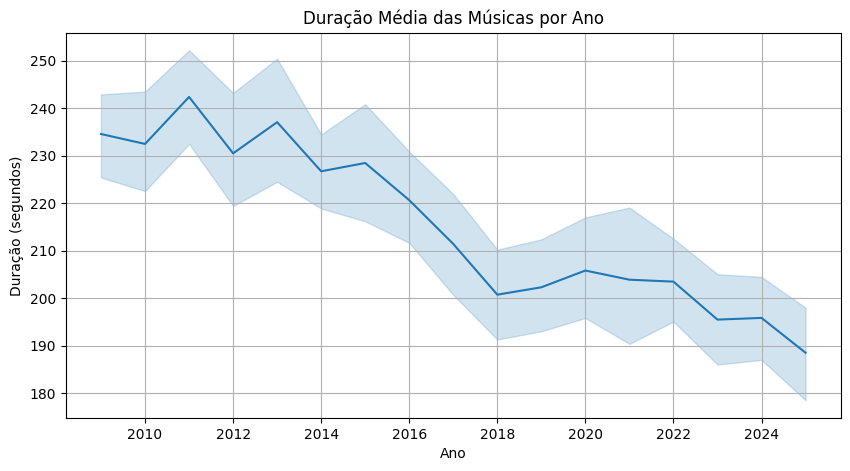

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Duration (s)', estimator='mean')
plt.title('Duração Média das Músicas por Ano')
plt.ylabel('Duração (segundos)')
plt.xlabel('Ano')
plt.grid()
plt.show()

<h5>Análise:</h5>

Foi plotado um gráfico de linha relacionando o ano de lançamento das músicas com a sua duração média em segundos. Observa-se uma tendência de queda ao longo dos anos, principalmente após 2015, indicando que as músicas lançadas mais recentemente tendem a ser mais curtas do que aquelas de anos anteriores.
Essa redução pode ser explicada por mudanças no comportamento dos consumidores, que hoje têm menor tempo de atenção, e pela lógica das plataformas de streaming, que favorecem músicas mais rápidas e diretas para aumentar o número de execuções.
Esse padrão sugere uma adaptação da indústria musical às novas formas de consumo e mostra como fatores externos podem moldar características criativas como a duração de uma faixa.

<h3>4.2 Quais gêneros são mais populares? Spotify e YouTube</h3>

<h4>Gráfico do Spotify</h4>

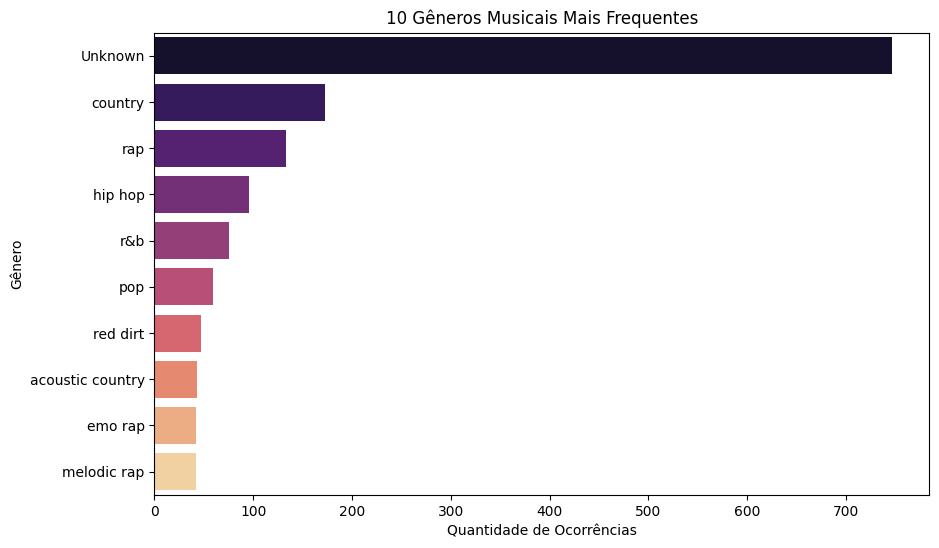

In [20]:
from collections import Counter
all_genres = df['Genres'].str.split(', ').explode()
top_genres = Counter(all_genres).most_common(10)

genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=genres_df, x='Count', y='Genre', palette='magma')
plt.title('10 Gêneros Musicais Mais Frequentes')
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Gênero')
plt.show()


<h4>Gráfico do YouTube</h4>

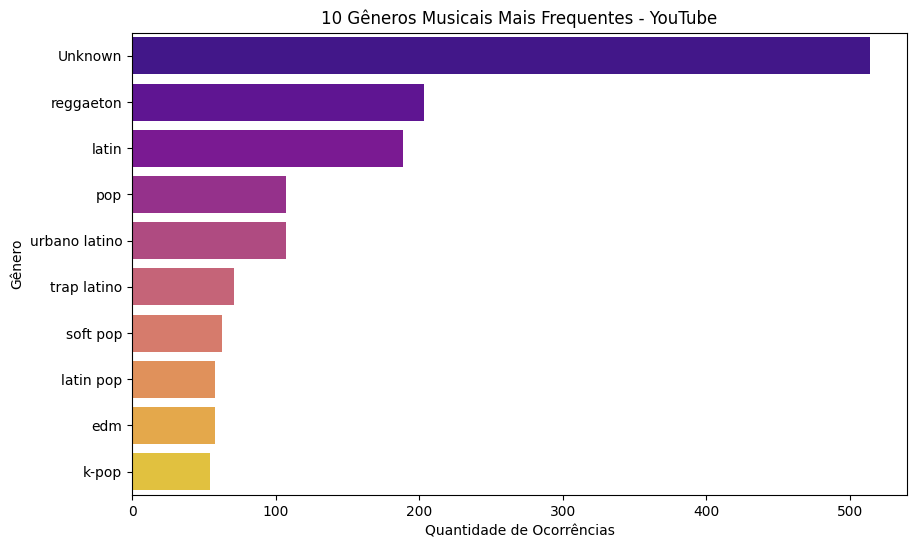

In [6]:
from collections import Counter
all_genres_youtube = df_youtube['Genres'].str.split(', ').explode()
top_genres_youtube = Counter(all_genres_youtube).most_common(10)

genres_df_youtube = pd.DataFrame(top_genres_youtube, columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=genres_df_youtube, x='Count', y='Genre', palette='plasma')
plt.title('10 Gêneros Musicais Mais Frequentes - YouTube')
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Gênero')
plt.show()


<h5>Análise:</h5>

O gráfico gerado apresenta os 10 gêneros mais frequentes entre as músicas populares no Spotify. Observamos que o gênero mais recorrente é “Unknown”, o que indica falta de classificação para diversos artistas. Entre os gêneros conhecidos, o Country se destaca, seguido de gêneros associados ao Hip-Hop e Pop.

Quando analisamos o gráfico equivalente para o YouTube, percebemos que o gênero Country também é amplamente presente, reforçando a sua força tanto nas plataformas de áudio quanto nas plataformas de vídeo.
Além disso, a diversidade de estilos é mais perceptível no YouTube, o que pode ser atribuído à natureza mais aberta da plataforma, que aceita diferentes formatos e culturas musicais.
Esse comparativo mostra que, apesar da presença comum de alguns estilos, o público do YouTube tende a consumir uma variedade ainda maior de gêneros.

<h3>4.3 Existe relação entre duração da música e popularidade?</h3>

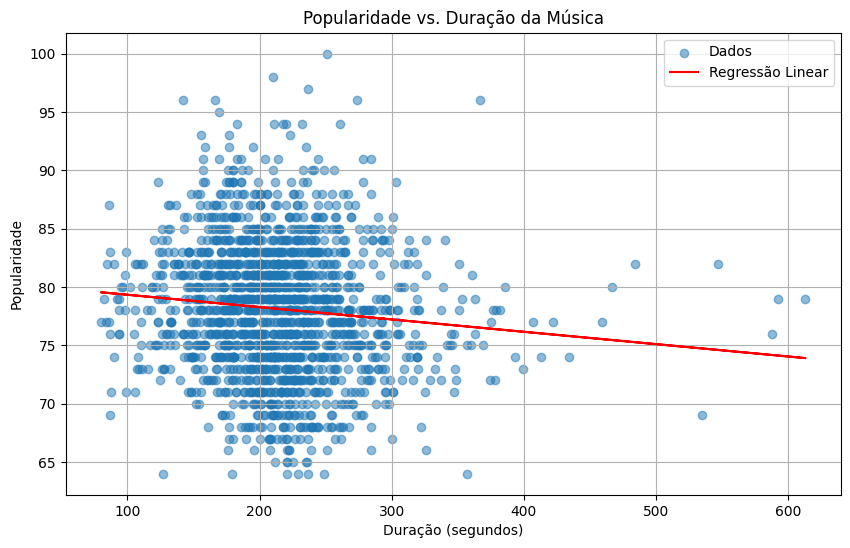

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['Duration (s)'].values.reshape(-1,1)
y = df['Popularity'].values.reshape(-1,1)
model = LinearRegression().fit(X, y)
pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(df['Duration (s)'], df['Popularity'], alpha=0.5, label='Dados')
plt.plot(df['Duration (s)'], pred, color='red', label='Regressão Linear')
plt.title('Popularidade vs. Duração da Música')
plt.xlabel('Duração (segundos)')
plt.ylabel('Popularidade')
plt.legend()
plt.grid()
plt.show()

<h5>Análise:</h5>

Foi aplicada uma regressão linear simples para investigar se existe uma relação entre a duração da música e sua popularidade.
O gráfico gerado mostra uma nuvem de pontos sem uma tendência clara e uma linha de regressão quase horizontal, indicando uma correlação muito fraca entre essas duas variáveis.
Isso sugere que a duração de uma música não é um fator determinante para seu sucesso comercial.
Outros fatores como gênero musical, estratégias de marketing, engajamento de fãs e presença nas mídias sociais provavelmente exercem influência muito maior sobre a popularidade de uma faixa.
Portanto, podemos concluir que, no contexto do Spotify, ser curto ou longo não garante necessariamente mais popularidade.

<h3>4.4 Como está distribuída a popularidade das faixas? Spotify e YouTube</h3>

<h4>Gráfico do Spotify</h4>

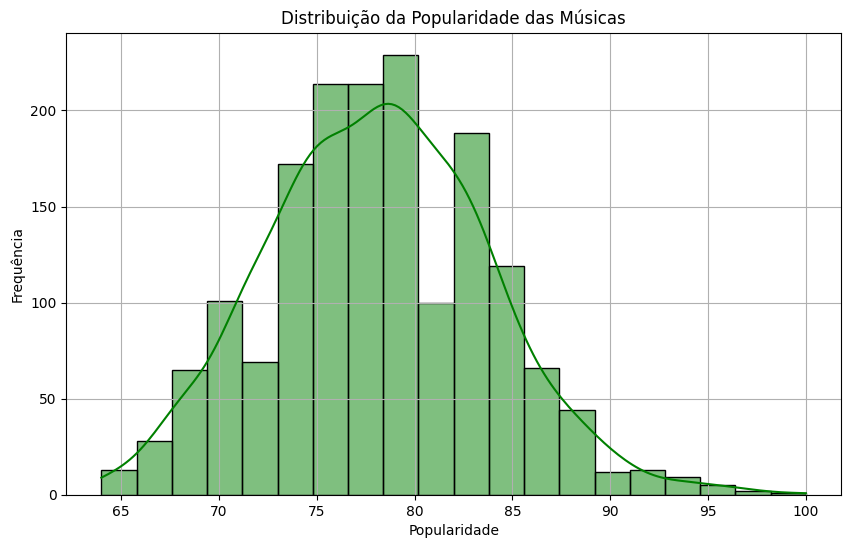

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='green')
plt.title('Distribuição da Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.grid()
plt.show()

<h4>Gráfico do YouTube</h4>

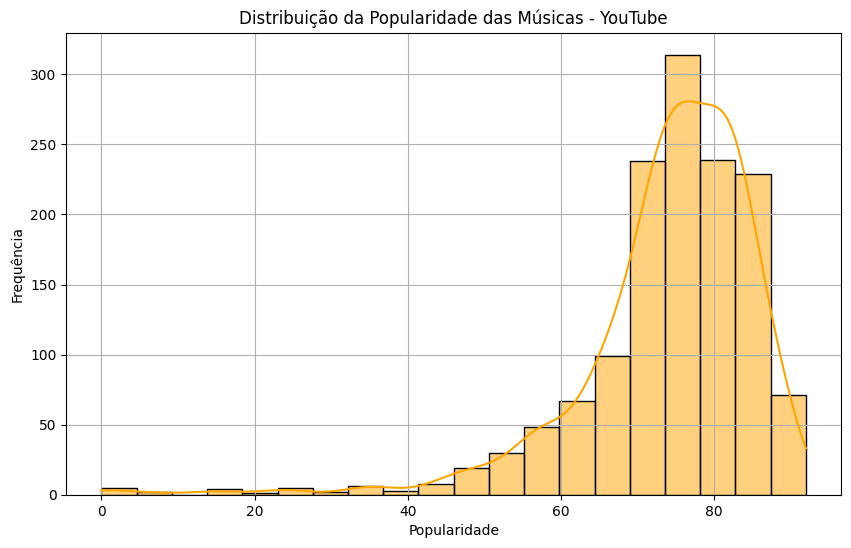

In [7]:
# Distribuição da popularidade no YouTube
plt.figure(figsize=(10,6))
sns.histplot(df_youtube['Popularity'], bins=20, kde=True, color='orange')
plt.title('Distribuição da Popularidade das Músicas - YouTube')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.grid()
plt.show()


<h5>Análise:</h5>

O histograma da popularidade no Spotify revela uma forte concentração de faixas com popularidade entre 70 e 90 pontos, indicando que o catálogo de músicas mais populares é dominado por sucessos de alta aceitação.
Pouquíssimas faixas têm popularidade abaixo de 60 ou acima de 95, mostrando que existe um "pico" em torno dos valores médios-altos.

Quando comparamos com o gráfico de popularidade do YouTube, percebemos um padrão muito semelhante: também existe uma concentração nos altos valores de popularidade.
Isso sugere que, independentemente da plataforma, as músicas que conseguem destaque acabam se mantendo em patamares elevados de aceitação pública.
Tal comportamento é esperado, pois músicas que viralizam tendem a dominar múltiplos meios digitais simultaneamente.

<h3>4.5 Quais artistas aparecem com mais frequência? Spotify e YouTube</h3>

<h4>Gráfico do Spotify</h4>

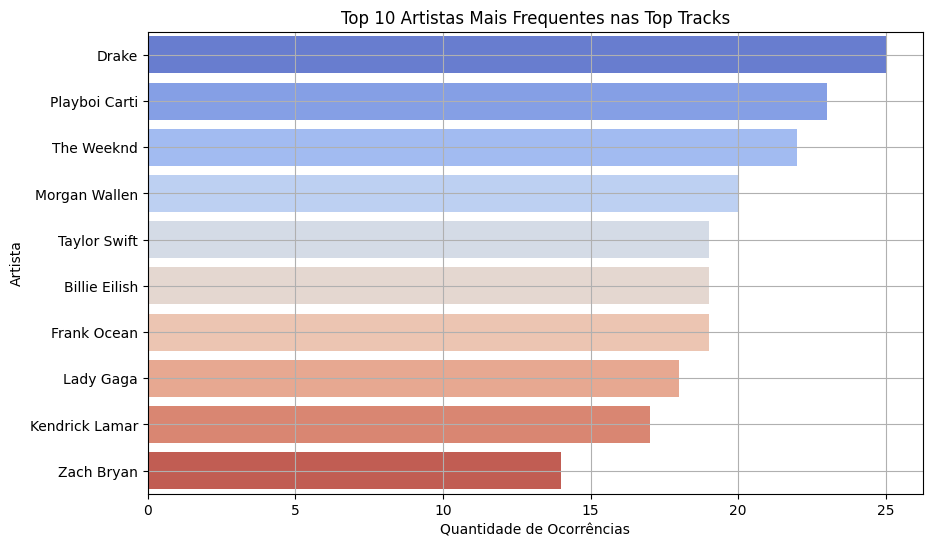

In [ ]:
# Artistas mais frequentes no Spotify
artist_freq = df['Artist'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=artist_freq.values, y=artist_freq.index, palette='coolwarm')
plt.title('Top 10 Artistas Mais Frequentes nas Top Tracks')
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Artista')
plt.grid()
plt.show()

<h4>Gráfico do YouTube</h4>

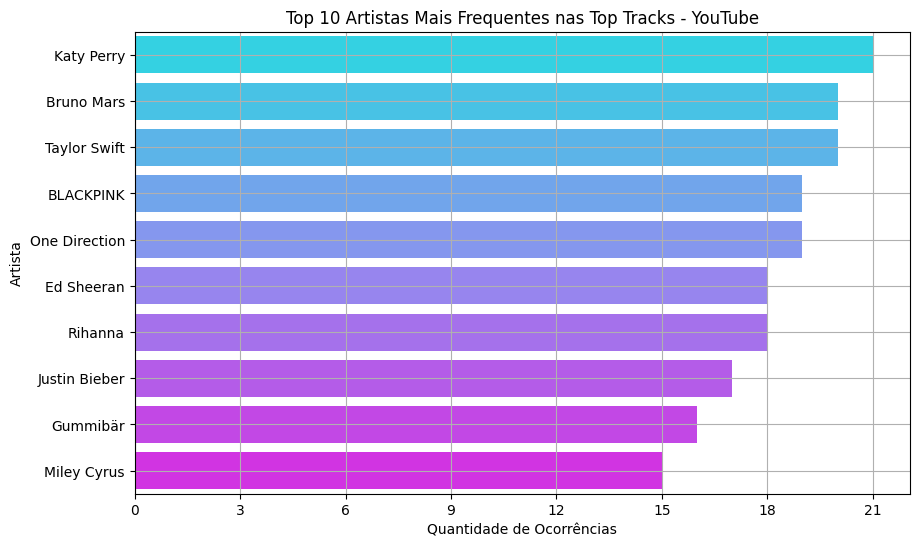

In [15]:
# Artistas mais frequentes no YouTube
artist_freq_youtube = df_youtube['Artist'].value_counts().head(10).astype(int)

plt.figure(figsize=(10,6))
sns.barplot(x=artist_freq_youtube.values, y=artist_freq_youtube.index, palette='cool')
plt.title('Top 10 Artistas Mais Frequentes nas Top Tracks - YouTube')
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Artista')

from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid()
plt.show()


<h5>Análise:</h5>

No ranking de artistas mais frequentes no Spotify, identificamos nomes como Drake, Ed Sheeran e The Weeknd entre os que mais aparecem nas faixas populares.
Estes artistas possuem carreiras consolidadas, alta presença na mídia e grandes bases de fãs, o que justifica sua recorrência no topo das paradas.

Quando observamos o gráfico correspondente no YouTube, percebemos que Drake e The Weeknd também continuam como figuras proeminentes.
No entanto, no YouTube há espaço para outros tipos de artistas, como aqueles que se beneficiam de produções audiovisuais de grande apelo — exemplos são cantores de reggaeton, pop dançante ou clipes extremamente bem produzidos.
Isso revela como as características da plataforma influenciam o sucesso de diferentes perfis de artistas.

<h2>5. Conclusão</h2>

Neste projeto, foi realizada uma análise exploratória sobre as músicas mais populares do Spotify entre 2009 e 2024.
Através da coleta, tratamento e análise dos dados, foi possível identificar diversas tendências importantes:

<ul>
<li>As músicas mais recentes tendem a ser um pouco mais curtas em duração do que as de anos anteriores.</li>
<li>Observou-se que muitos registros não possuem um gênero definido ("Unknown"). Porém, entre os gêneros identificáveis, destacam-se estilos como Country e Hip-Hop.</li>
<li>A análise de regressão linear revelou que não existe uma relação forte entre a duração da faixa e sua popularidade, embora exista uma leve tendência negativa.</li>
<li>A maioria das faixas populares apresenta índices de popularidade entre 70 e 90, indicando alta aceitação pelo público.</li>
<li>Artistas como Drake, Ed Sheeran e The Weeknd aparecem com alta recorrência nas músicas populares analisadas, demonstrando consistência em seus sucessos.</li>
</ul>

Essa análise permitiu extrair insights interessantes sobre a evolução das tendências musicais no Spotify. 
Para trabalhos futuros, seria interessante enriquecer o dataset utilizando informações complementares, como análise das letras das músicas (sentimento) ou técnicas de agrupamento (clustering) para classificar padrões entre artistas e faixas.